In [41]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from scipy.misc import imread
import os 
%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import random
import glob
import scipy.cluster.hierarchy as hac
from sklearn import mixture

In [36]:
# MA_cities = {"Boston" : [], "Worcester" : [], "Salem" : [], "Plymouth" : [], "Newton" : [], "Waltham" : [], "Framingham" : []}
MA_cities = {"Boston" : []}
city_detail = [400, 700, 200, 600]
cwd = os.getcwd()

In [17]:
def read_company_csv(file_name, result):
    with open("Company/" + file_name, newline = '', encoding = 'utf-8') as csvfile:
        datareader = csv.reader(csvfile, delimiter = ',')
        next(datareader)
        for row in datareader:
            if (row[2] in MA_cities):
                result.append(row)

In [18]:
result = []
path = cwd + "\Company"
files = os.listdir(path)
for file_name in files:
    read_company_csv(file_name, result)

In [19]:
str_list = []
for x in result:
    str = x[1] + " " + x[2]
    str_list.append(str)

In [20]:
print(str_list)

['Communications Boston', 'Communications Boston', 'Co-op Engineer, Technology SoC team Boston', 'Co-op Engineer, Technology SoC team Boston', 'Risk Data Modelling Analyst - Scrum Master Boston', 'Senior Technical Writer Boston', 'Senior Database Engineer Boston', 'do not give out Boston', 'Software Engineer III Boston', 'QA Software Engineer Boston', 'Risk Data Modelling Analyst - Scrum Master Boston', 'Senior Technical Writer Boston', 'do not give out Boston', 'QA Software Engineer Boston', 'Senior Database Engineer Boston', 'Software Engineer III Boston', 'Risk Data Modelling Analyst - Scrum Master Boston', 'Senior Technical Writer Boston', 'do not give out Boston', 'QA Software Engineer Boston', 'Senior Database Engineer Boston', 'Software Engineer III Boston', 'Risk Data Modelling Analyst - Scrum Master Boston', 'Senior Technical Writer Boston', 'do not give out Boston', 'QA Software Engineer Boston', 'Senior Database Engineer Boston', 'Software Engineer III Boston', 'Business Ana

In [21]:
vectorizer = TfidfVectorizer(min_df = 1)
D = vectorizer.fit_transform(str_list)

In [22]:
k = 9
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
kmeans_predict = kmeans.fit_predict(D)

In [23]:
print("K means")
print("Top terms per cluster:")
asc_order_centroids = kmeans.cluster_centers_.argsort()#[:, ::-1]
order_centroids = asc_order_centroids[:,::-1]
terms = vectorizer.get_feature_names()
for i in range(k):
    print("Cluster {}:".format(i))
    for ind in order_centroids[i, :10]:
        print(' {}'.format(terms[ind]))
    print('')

K means
Top terms per cluster:
Cluster 0:
 research
 assistant
 boston
 clinical
 coordinator
 fellow
 ii
 lab
 technician
 associate

Cluster 1:
 assistant
 administrative
 vice
 president
 boston
 training
 clinical
 executive
 office
 ii

Cluster 2:
 patient
 services
 specialist
 care
 boston
 coordinator
 service
 associate
 observer
 transporter

Cluster 3:
 advisor
 treasury
 solutions
 financial
 boston
 zumba
 estágio
 escort
 estate
 estimator

Cluster 4:
 medical
 assistant
 boston
 ii
 lead
 extern
 technologist
 records
 abstractor
 interpreter

Cluster 5:
 compliance
 billing
 boston
 and
 trade
 analyst
 manager
 associate
 officer
 business

Cluster 6:
 boston
 analyst
 associate
 manager
 intern
 senior
 nurse
 sales
 coordinator
 operations

Cluster 7:
 engineer
 project
 boston
 manager
 senior
 solutions
 software
 coordinator
 structural
 qa

Cluster 8:
 administrator
 portfolio
 boston
 fund
 grants
 contract
 client
 associate
 systems
 ais



In [42]:
z = hac.linkage(D.toarray(), 'ward')
print(z)

[[  0.00000000e+00   1.00000000e+00   0.00000000e+00   2.00000000e+00]
 [  2.00000000e+00   3.00000000e+00   0.00000000e+00   2.00000000e+00]
 [  4.00000000e+00   1.00000000e+01   0.00000000e+00   2.00000000e+00]
 ..., 
 [  1.09810000e+04   1.10010000e+04   1.54094046e+01   5.14400000e+03]
 [  8.58900000e+03   1.10020000e+04   1.56973940e+01   5.27600000e+03]
 [  1.09980000e+04   1.10030000e+04   1.73137012e+01   5.50300000e+03]]


In [43]:
T = hac.fcluster(z, 10, 'maxclust')
print(T)

[10 10 10 ..., 10 10 10]


In [44]:
gmix = mixture.GMM(n_components=9, covariance_type='full')
gmix.fit(D.toarray())
print(gmix.means_)
GT = gmix.fit_predict(D.toarray())

[[  1.30043045e-168   3.47457395e-183   1.99755702e-044 ...,
    4.37204762e-105   7.67475288e-098   3.82353199e-076]
 [  1.27775647e-003   1.67583728e-190   4.64676138e-053 ...,
    1.02354302e-097   5.05952076e-086   1.71105582e-067]
 [  4.88588457e-176   6.09383203e-194   5.45832117e-046 ...,
    1.52930180e-109   8.70657874e-081   2.75762409e-085]
 ..., 
 [  4.00230377e-179   2.34990317e-205   7.80682841e-061 ...,
    7.28597814e-117   1.75734426e-095   5.79575938e-087]
 [  7.59878049e-177   5.20210921e-180   2.41287147e-026 ...,
    2.02182434e-120   8.46719519e-083   9.54327427e-090]
 [  1.93255294e-154   1.84253357e-192   4.36695937e-059 ...,
    2.73247988e-113   1.88176120e-116   3.35810281e-068]]


KeyboardInterrupt: 

In [ ]:
# z = hac.linkage(D.toarray(), 'ward')
# T = hac.fcluster(z, 10, 'maxclust')
# hierarchy_result = [None]*10
# for i in range(0, len(T)):
#     if (hierarchy_result[T[i]-1] is None):
#         hierarchy_result[T[i]-1] = []
#     else:
#         if (parsed_data[i]['categories'][0] in hierarchy_result[T[i] - 1]):
#             continue
#         hierarchy_result[T[i]-1].append(str_list[i]['categories'][0])

In [ ]:
# print("Hierarchy Cluster")
# print("Top terms per cluster:")

# for i in range(10):
#     print("Cluster {}:".format(i))
#     new_result = hierarchy_result[i]
#     for ind in new_result[0: 3]:
#         print(' {}'.format(ind))
#     print('')

In [ ]:
# gmm_result = [None]*9
# for i in range(0, len(GT)):
#     if (gmm_result[GT[i]-1] is None):
#         gmm_result[GT[i]-1] = []
#     else:
#         if (parsed_data[i]['categories'][0] in gmm_result[GT[i] - 1]):
#             continue
#         gmm_result[GT[i]-1].append(parsed_data[i]['categories'][0])

In [ ]:
# print("GMM Cluster")
# print("Top terms per cluster:")

# for i in range(9):
#     print("Cluster {}:".format(i))
#     new_result = gmm_result[i]
#     for ind in new_result[0: 5]:
#         print(' {}'.format(ind))
#     print('')

In [24]:
# datafile = cbook.get_sample_data(cwd + '\Boston.png')
# img = imread(datafile)

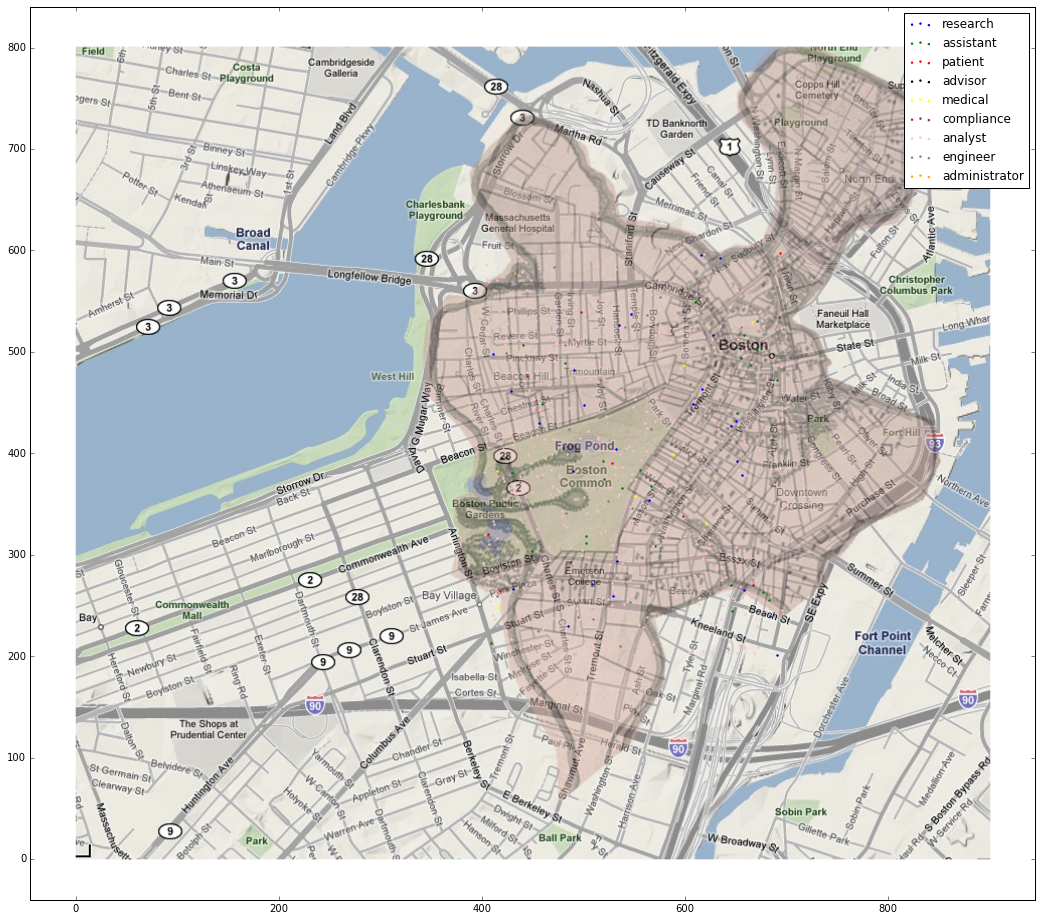

In [45]:
width = 18
height = 16
plt.figure(figsize=(width, height))
plt.imshow(img, extent = [0, 900, 0, 800])
# K-Means scatter plot
colors = ['blue', 'green', 'red', 'black', 'yellow', 'brown', 'pink', 'grey', 'orange']
for i in range(0, 500):
    X = random.uniform(city_detail[0], city_detail[1])
    Y = random.uniform(city_detail[2], city_detail[3])
    if (kmeans.labels_[i] == 0):
        plta = plt.scatter(x = X, y = Y, color = colors[0], s = 2)
    elif (kmeans.labels_[i] == 1):
        pltb = plt.scatter(x = X, y = Y, color = colors[1], s = 2)
    elif (kmeans.labels_[i] == 2):
        pltc = plt.scatter(x = X, y = Y, color = colors[2], s = 2)
    elif (kmeans.labels_[i] == 3):
        pltd = plt.scatter(x = X, y = Y, color = colors[3], s = 2)
    elif (kmeans.labels_[i] == 4):
        plte = plt.scatter(x = X, y = Y, color = colors[4], s = 2)
    elif (kmeans.labels_[i] == 5):
        pltf = plt.scatter(x = X, y = Y, color = colors[5], s = 2)
    elif (kmeans.labels_[i] == 6):
        pltg = plt.scatter(x = X, y = Y, color = colors[6], s = 2)
    elif (kmeans.labels_[i] == 7):
        plth = plt.scatter(x = X, y = Y, color = colors[7], s = 2)
    elif (kmeans.labels_[i] == 8):
        plti = plt.scatter(x = X, y = Y, color = colors[8], s = 2)
# plt.scatter(x = 1200, y = 1200, s=0)
plt.legend((plta, pltb, pltc, pltd, plte, pltf, pltg, plth, plti), 
           (terms[order_centroids[0, 0]], 
            terms[order_centroids[1, 0]], 
            terms[order_centroids[2, 0]], 
            terms[order_centroids[3, 0]],
            terms[order_centroids[4, 0]],
            terms[order_centroids[5, 0]],
            terms[order_centroids[6, 1]],
            terms[order_centroids[7, 0]],
            terms[order_centroids[8, 0]]))

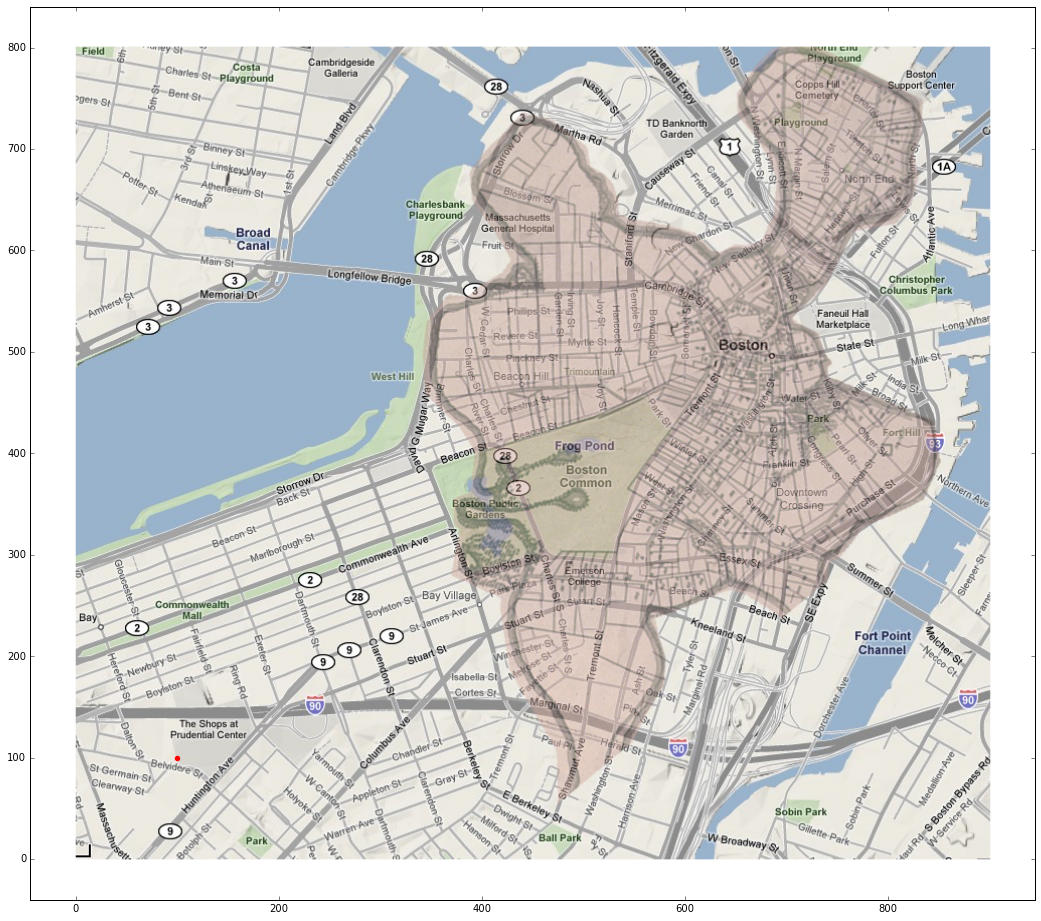

In [68]:
width = 18
height = 16
plt.figure(figsize=(width, height))
plt.imshow(img, extent = [0, 900, 0, 800])
# plt.scatter(x = 100, y = 100, color = 'red', s = 20)
plt.show()